# Multi layer Perceptron

Multi-layer Perceptron (MLP) is a type of feedforward neural network that uses multiple layers of interconnected nodes or "neurons" to process inputs. Each layer of nodes applies a different set of weights and biases to the inputs, allowing the network to learn complex relationships between inputs and outputs. MLPs are commonly used for classification and regression tasks, and are particularly effective when dealing with high-dimensional data. 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [9]:
#load the dataset
tips = sns.load_dataset('tips')

#preprocessing 
# converting categorical varaibles to dummy variables
tips =pd.get_dummies(tips, drop_first=True)

#selectin features and target variable
X= tips.drop('tip', axis=1)
y= tips['tip']

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#standardizing the features
scaler= StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  #input layer
    tf.keras.layers.Dense(32, activation='relu'), #hidden ayer
    tf.keras.layers.Dense(1) #output layer for regression
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

#evaluating the model (using mean squared error)
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on Test Set: {loss[0]}')









Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.0141 - mae: 3.1708  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4026 - mae: 2.7275  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2547 - mae: 2.2954 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4880 - mae: 1.8896 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1176 - mae: 1.5517 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0762 - mae: 1.3072 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4606 - mae: 1.1453 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1241 - mae: 1.0636
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9007 - mae: 1.0208 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7539 - mae: 0.9993 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6330 - mae: 0.9732 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5274 - mae: 0.9423 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

Mean Squared Error on Test Set: 1.1971379518508911


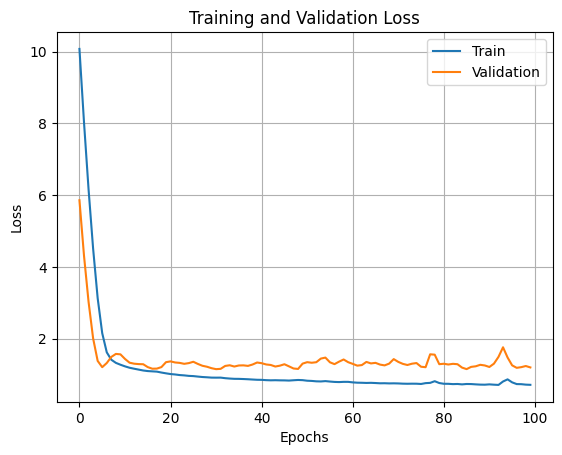

In [10]:
# building the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

#training the model 
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

#evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss[0]}')

# This code trains a neural network to predict tips based on various features from the tips dataset using TensorFlow and Keras.

#ploting the tarining and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



### **Validation set:**
The validation set is a subset of the data used during training to:

- Evaluate the model after each epoch, but not used for training (i.e., weights are not updated using this set).

- Monitor the model's performance to detect overfitting or underfitting.

- Help with hyperparameter tuning (like learning rate, batch size, etc.).

Think of it as the "checkpoint" to see how well the model generalizes during training.

### **Validation Loss:**
The validation loss is the loss (or error) measured on the validation set. It:

- Is computed using the same loss function as training (e.g., cross-entropy, MSE, etc.).

- Indicates how well the model performs on unseen (but still similar) data.

- If it decreases, your model is generalizing well.

- If it starts increasing while training loss decreases, this means overfitting — the model is learning the training data too well and failing to generalize.

## Early  stopping of epochs


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 7.1925 - val_loss: 3.7601
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.4269 - val_loss: 2.5522
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9464 - val_loss: 1.6122
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7388 - val_loss: 1.0268
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8768 - val_loss: 0.8437
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4673 - val_loss: 0.9532
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3379 - val_loss: 1.0570
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2701 - val_loss: 1.1182
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2336 - val_loss: 1.0852
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1788 - val_loss: 1.0813


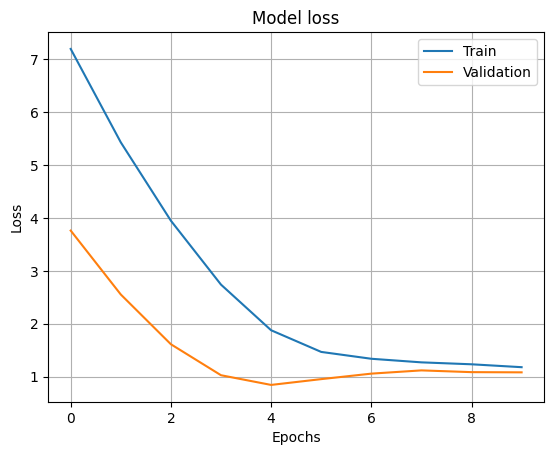

In [12]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stropping = EarlyStopping(patience=5)

#train the model wit the callaback function

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stropping])

#Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)

#plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
